In [ ]:
pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pennylane as qml

a = 2 #0.5 #0.25
b = 0.75

# matrix to be decomposed
A = np.array(
    [[a,  0, 0,  0],
     [0, 0, 0,  0],
     [0,  0, 0,  0],
     [0,  0, 0, 0]]
)

LCU = qml.pauli_decompose(A)
LCU_coeffs, LCU_ops = LCU.terms()

print(f"LCU decomposition:\n {LCU}")
print(f"Coefficients:\n {LCU_coeffs}")
print(f"Unitaries:\n {LCU_ops}")

LCU decomposition:
 0.5 * (I(0) @ I(1)) + 0.5 * (I(0) @ Z(1)) + 0.5 * (Z(0) @ I(1)) + 0.5 * (Z(0) @ Z(1))
Coefficients:
 [0.5 0.5 0.5 0.5]
Unitaries:
 [I(0) @ I(1), I(0) @ Z(1), Z(0) @ I(1), Z(0) @ Z(1)]


In [ ]:
yfft = np.fft.fft([0.5, 0.5, 0.5, 0.5])

normalized  = (np.sqrt([0.5, 0.5, 0.5 ,0.5]) / np.linalg.norm(np.sqrt([0.5, 0.5, 0.5, 0.5])))

normalized_q = [0.5,0.5,0.5,0.5] / np.linalg.norm([0.5,0.5,0.5,0.5])

print(normalized)
print(normalized_q)
print(yfft)

[0.5 0.5 0.5 0.5]
[0.5 0.5 0.5 0.5]
[2.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [ ]:
dev1 = qml.device("default.qubit", wires=1)

# normalized square roots of coefficients
alphas = (np.sqrt(LCU_coeffs) / np.linalg.norm(np.sqrt(LCU_coeffs)))


@qml.qnode(dev1)
def prep_circuit():
    qml.StatePrep(alphas, wires=0)
    return qml.state()


print("Target state: ", alphas)
print("Output state: ", np.real(prep_circuit()))

Target state:  [0.5 0.5 0.5 0.5]


ValueError: State vector must have shape (2**wires,) or (batch_size, 2**wires).

In [ ]:
import numpy as np
import pennylane as qml

a = 2 #0.5 #0.25
b = 0.75

# Matrix to be decomposed
A = np.array(
    [[a,  0, 0,  0],
     [0, 0, 0,  0],
     [0,  0, 0,  0],
     [0,  0, 0, 0]]
)

LCU = qml.pauli_decompose(A)
LCU_coeffs, LCU_ops = LCU.terms()

print(f"LCU decomposition:\n {LCU}")
print(f"Coefficients:\n {LCU_coeffs}")
print(f"Unitaries:\n {LCU_ops}")

dev1 = qml.device("default.qubit", wires=2)

# Normalized square roots of coefficients
alphas = np.sqrt(LCU_coeffs) / np.linalg.norm(np.sqrt(LCU_coeffs))

@qml.qnode(dev1)
def prep_circuit():
    qml.StatePrep(alphas, wires=[0, 1])
    return qml.state()

print("Target state: ", alphas)
print("Output state: ", np.real(prep_circuit()))

LCU decomposition:
 0.5 * (I(0) @ I(1)) + 0.5 * (I(0) @ Z(1)) + 0.5 * (Z(0) @ I(1)) + 0.5 * (Z(0) @ Z(1))
Coefficients:
 [0.5 0.5 0.5 0.5]
Unitaries:
 [I(0) @ I(1), I(0) @ Z(1), Z(0) @ I(1), Z(0) @ Z(1)]
Target state:  [0.5 0.5 0.5 0.5]
Output state:  [0.5 0.5 0.5 0.5]


In [ ]:
import matplotlib.pyplot as plt

dev2 = qml.device("default.qubit", wires=3)

# unitaries
ops = LCU_ops
# relabeling wires: 0 → 1, and 1 → 2
unitaries = [qml.map_wires(op, {0: 1, 1: 2}) for op in ops]


@qml.qnode(dev2)
def sel_circuit(qubit_value):
    qml.BasisState(qubit_value, wires=0)
    qml.Select(unitaries, control=0)
    return qml.expval(qml.PauliZ(2))

qml.draw_mpl(sel_circuit, style='pennylane')([0])
plt.show()

ValueError: Not enough control wires (1) for the desired number of operations (4). At least 2 control wires required.

LCU decomposition:
 0.5 * (I(0) @ I(1)) + 0.5 * (I(0) @ Z(1)) + 0.5 * (Z(0) @ I(1)) + 0.5 * (Z(0) @ Z(1))
Coefficients:
 [0.5 0.5 0.5 0.5]
Unitaries:
 [I(0) @ I(1), I(0) @ Z(1), Z(0) @ I(1), Z(0) @ Z(1)]
Target state:  [0.5 0.5 0.5 0.5]
Output state:  [0.5 0.  0.5 0.  0.5 0.  0.5 0. ]
Running sel_circuit with input [1, 0, 0]: 1.0


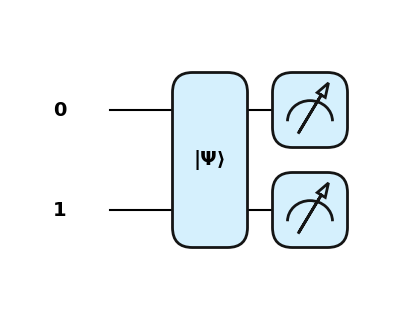

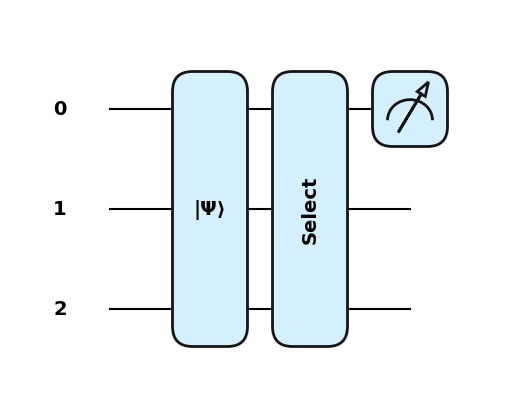

In [ ]:
import numpy as np
import pennylane as qml

a = 2 #0.5 #0.25
b = 0.75

# Matrix to be decomposed
A = np.array(
    [[a,  0, 0,  0],
     [0, 0, 0,  0],
     [0,  0, 0,  0],
     [0,  0, 0, 0]]
)

LCU = qml.pauli_decompose(A)
LCU_coeffs, LCU_ops = LCU.terms()

print(f"LCU decomposition:\n {LCU}")
print(f"Coefficients:\n {LCU_coeffs}")
print(f"Unitaries:\n {LCU_ops}")

dev1 = qml.device("default.qubit", wires=3)

# Normalized square roots of coefficients
alphas = np.sqrt(LCU_coeffs) / np.linalg.norm(np.sqrt(LCU_coeffs))

@qml.qnode(dev1)
def prep_circuit():
    qml.StatePrep(alphas, wires=[0, 1])
    return qml.state()

print("Target state: ", alphas)
print("Output state: ", np.real(prep_circuit()))

# Create instances of the unitary operations
unitaries = [qml.PauliX(wires=0), qml.PauliY(wires=0), qml.PauliZ(wires=0), qml.Identity(wires=0)]

@qml.qnode(dev1)
def sel_circuit(qubit_value):
    qml.BasisState(qubit_value, wires=[0, 1, 2])
    qml.Select(unitaries, control=[1, 2])
    return qml.expval(qml.PauliZ(0))

# Create a valid state vector for the basis state
state_vector = np.array([1, 0, 0])

print("Running sel_circuit with input [1, 0, 0]:", sel_circuit(state_vector))

# Plotting the prep_circuit
import matplotlib.pyplot as plt

fig, ax = qml.draw_mpl(prep_circuit, style='pennylane')()
plt.show()

# Plotting the sel_circuit
fig, ax = qml.draw_mpl(sel_circuit, style='pennylane')(state_vector)
plt.show()


In [ ]:
print('Expectation value for input |0>:', sel_circuit([0]))
print('Expectation value for input |1>:', sel_circuit([1]))

ValueError: BasisState parameter and wires must be of equal length.

LCU decomposition:
 0.5 * (I(0) @ I(1)) + 0.5 * (I(0) @ Z(1)) + 0.5 * (Z(0) @ I(1)) + 0.5 * (Z(0) @ Z(1))
Coefficients:
 [0.5 0.5 0.5 0.5]
Unitaries:
 [I(0) @ I(1), I(0) @ Z(1), Z(0) @ I(1), Z(0) @ Z(1)]
Target state:  [0.5 0.5 0.5 0.5]
Output state:  [0.5 0.  0.5 0.  0.5 0.  0.5 0. ]
Expectation value for input |0>: -1.0
Expectation value for input |1>: 1.0


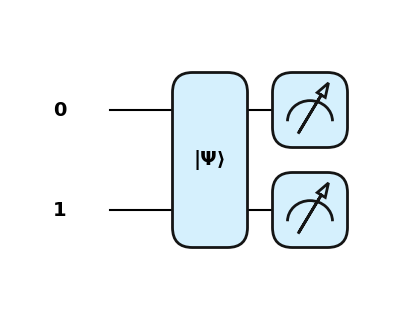

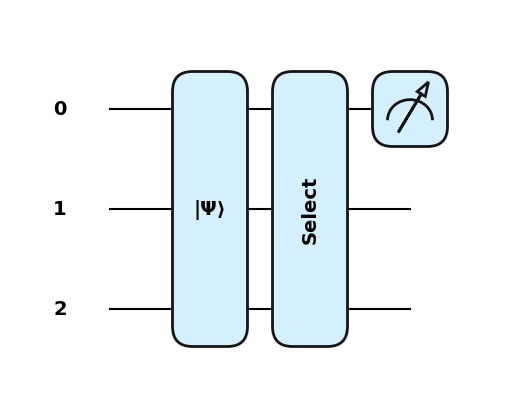

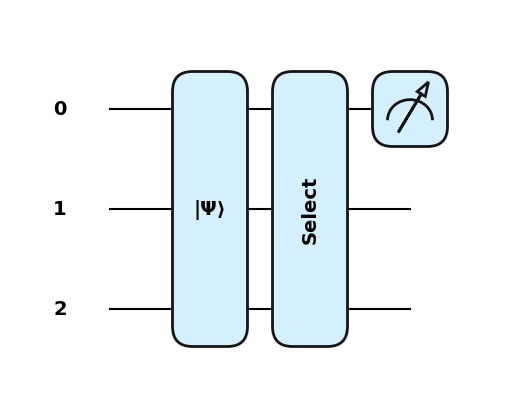

In [ ]:
import numpy as np
import pennylane as qml

a = 2 #0.5 #0.25
b = 0.75

# Matrix to be decomposed
A = np.array(
    [[a,  0, 0,  0],
     [0, 0, 0,  0],
     [0,  0, 0,  0],
     [0,  0, 0, 0]]
)

LCU = qml.pauli_decompose(A)
LCU_coeffs, LCU_ops = LCU.terms()

print(f"LCU decomposition:\n {LCU}")
print(f"Coefficients:\n {LCU_coeffs}")
print(f"Unitaries:\n {LCU_ops}")

dev1 = qml.device("default.qubit", wires=3)

# Normalized square roots of coefficients
alphas = np.sqrt(LCU_coeffs) / np.linalg.norm(np.sqrt(LCU_coeffs))

@qml.qnode(dev1)
def prep_circuit():
    qml.StatePrep(alphas, wires=[0, 1])
    return qml.state()

print("Target state: ", alphas)
print("Output state: ", np.real(prep_circuit()))

# Create instances of the unitary operations
unitaries = [qml.PauliX(wires=0), qml.PauliY(wires=0), qml.PauliZ(wires=0), qml.Identity(wires=0)]

@qml.qnode(dev1)
def sel_circuit(qubit_value):
    # Extend the single qubit input to match the required length
    extended_state = np.zeros(3, dtype=int)
    extended_state[:len(qubit_value)] = qubit_value
    qml.BasisState(extended_state, wires=[0, 1, 2])
    qml.Select(unitaries, control=[1, 2])
    return qml.expval(qml.PauliZ(0))

print('Expectation value for input |0>:', sel_circuit([0]))
print('Expectation value for input |1>:', sel_circuit([1]))

# Plotting the prep_circuit
import matplotlib.pyplot as plt

fig, ax = qml.draw_mpl(prep_circuit, style='pennylane')()
plt.show()

# Plotting the sel_circuit for input |0>
fig, ax = qml.draw_mpl(sel_circuit, style='pennylane')([0])
plt.show()

# Plotting the sel_circuit for input |1>
fig, ax = qml.draw_mpl(sel_circuit, style='pennylane')([1])
plt.show()


In [ ]:
@qml.qnode(dev2)
def lcu_circuit():  # block_encode
    # PREP
    qml.StatePrep(alphas, wires=0)

    # SEL
    qml.Select(unitaries, control=0)

    # PREP_dagger
    qml.adjoint(qml.StatePrep(alphas, wires=0))
    return qml.state()


output_matrix = qml.matrix(lcu_circuit)()
print("A:\n", A, "\n")
print("Block-encoded A:\n")
print(np.real(np.round(output_matrix,2)))
print()

qml.draw_mpl(lcu_circuit, style='pennylane')()
plt.show()

ValueError: State vector must have shape (2**wires,) or (batch_size, 2**wires).

LCU decomposition:
 0.5 * (I(0) @ I(1)) + 0.5 * (I(0) @ Z(1)) + 0.5 * (Z(0) @ I(1)) + 0.5 * (Z(0) @ Z(1))
Coefficients:
 [0.5 0.5 0.5 0.5]
Unitaries:
 [I(0) @ I(1), I(0) @ Z(1), Z(0) @ I(1), Z(0) @ Z(1)]
Target state:  [0.5 0.5 0.5 0.5]
Output state:  [0.5 0.5 0.5 0.5]
A:
 [[2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] 

Block-encoded A:

[[ 1. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-0.  0.  1. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -0.  0. -0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0. -1.  0.  0. 

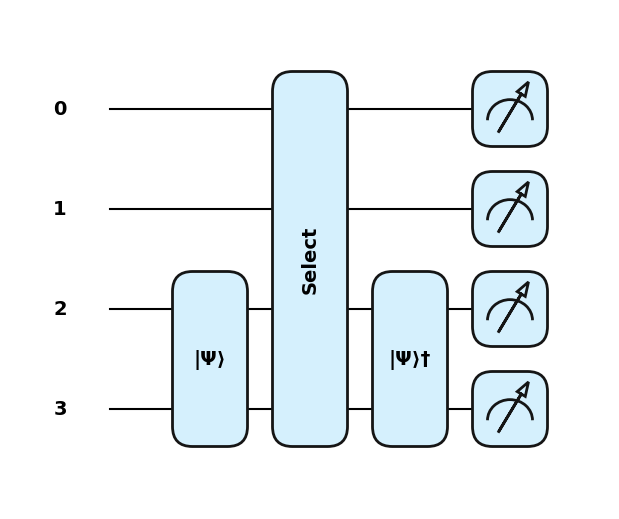

In [ ]:
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

a = 2  # 0.5 #0.25
b = 0.75

# Matrix to be decomposed
A = np.array(
    [[a, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0]]
)

LCU = qml.pauli_decompose(A)
LCU_coeffs, LCU_ops = LCU.terms()

print(f"LCU decomposition:\n {LCU}")
print(f"Coefficients:\n {LCU_coeffs}")
print(f"Unitaries:\n {LCU_ops}")

dev1 = qml.device("default.qubit", wires=2)

# Normalized square roots of coefficients
alphas = np.sqrt(LCU_coeffs) / np.linalg.norm(np.sqrt(LCU_coeffs))

@qml.qnode(dev1)
def prep_circuit():
    qml.StatePrep(alphas, wires=[0, 1])
    return qml.state()

print("Target state: ", alphas)
print("Output state: ", np.real(prep_circuit()))

# Create instances of the unitary operations
unitaries = [
    qml.Identity(wires=[2, 3]),
    qml.Identity(wires=2) @ qml.PauliZ(wires=3),
    qml.PauliZ(wires=2) @ qml.Identity(wires=3),
    qml.PauliZ(wires=2) @ qml.PauliZ(wires=3)
]

dev2 = qml.device("default.qubit", wires=4)

@qml.qnode(dev2)
def lcu_circuit():  # block_encode
    # PREP
    qml.StatePrep(alphas, wires=[2, 3])

    # SEL
    qml.Select(unitaries, control=[0, 1])

    # PREP_dagger
    qml.adjoint(qml.StatePrep(alphas, wires=[2, 3]))
    return qml.state()

output_matrix = qml.matrix(lcu_circuit)()
print("A:\n", A, "\n")
print("Block-encoded A:\n")
print(np.real(np.round(output_matrix, 2)))
print()

qml.draw_mpl(lcu_circuit, style='pennylane')()
plt.show()


LCU decomposition:
 0.5 * (I(0) @ I(1)) + 0.5 * (I(0) @ Z(1)) + 0.5 * (Z(0) @ I(1)) + 0.5 * (Z(0) @ Z(1))
Coefficients:
 [0.5 0.5 0.5 0.5]
Unitaries:
 [I(0) @ I(1), I(0) @ Z(1), Z(0) @ I(1), Z(0) @ Z(1)]
Target state:  [0.5 0.5 0.5 0.5]
Output state:  [0.5 0.5 0.5 0.5]
A:
 [[2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] 

Block-encoded A:

[[ 1. -0. -0. ...  0.  0.  0.]
 [ 0.  1. -0. ...  0.  0.  0.]
 [-0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1. -0. -0.]
 [ 0.  0.  0. ...  0.  1. -0.]
 [ 0.  0.  0. ... -0.  0.  1.]]



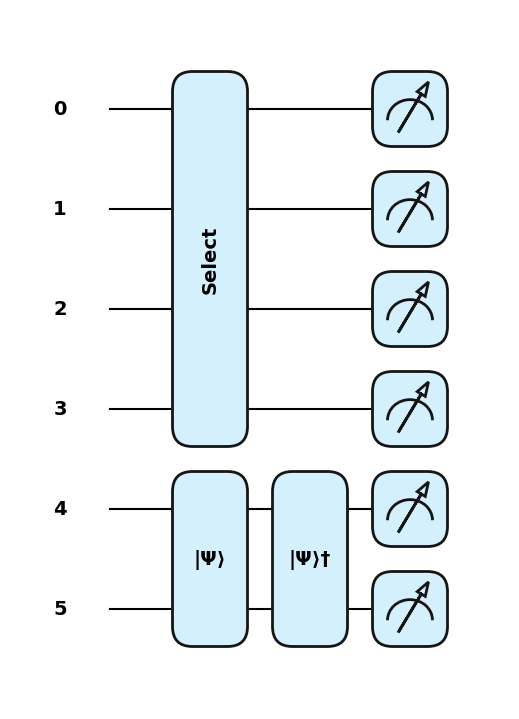

In [ ]:
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

a = 2  # 0.5 #0.25
b = 0.75

# Matrix to be decomposed
A = np.array(
    [[a, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0]]
)

LCU = qml.pauli_decompose(A)
LCU_coeffs, LCU_ops = LCU.terms()

print(f"LCU decomposition:\n {LCU}")
print(f"Coefficients:\n {LCU_coeffs}")
print(f"Unitaries:\n {LCU_ops}")

dev1 = qml.device("default.qubit", wires=2)

# Normalized square roots of coefficients
alphas = np.sqrt(LCU_coeffs) / np.linalg.norm(np.sqrt(LCU_coeffs))

@qml.qnode(dev1)
def prep_circuit():
    qml.StatePrep(alphas, wires=[0, 1])
    return qml.state()

print("Target state: ", alphas)
print("Output state: ", np.real(prep_circuit()))

# Create instances of the unitary operations
unitaries = [
    qml.Identity(wires=[2, 3]),
    qml.Identity(wires=2) @ qml.PauliZ(wires=3),
    qml.PauliZ(wires=2) @ qml.Identity(wires=3),
    qml.PauliZ(wires=2) @ qml.PauliZ(wires=3)
]

dev2 = qml.device("default.qubit", wires=6)

@qml.qnode(dev2)
def lcu_circuit():  # block_encode
    # PREP
    qml.StatePrep(alphas, wires=[4, 5])

    # SEL
    qml.Select(unitaries, control=[0, 1])

    # PREP_dagger
    qml.adjoint(qml.StatePrep(alphas, wires=[4, 5]))
    return qml.state()

output_matrix = qml.matrix(lcu_circuit)()
print("A:\n", A, "\n")
print("Block-encoded A:\n")
print(np.real(np.round(output_matrix, 2)))
print()

qml.draw_mpl(lcu_circuit, style='pennylane')()
plt.show()


LCU decomposition:
 0.5 * (I(0) @ I(1)) + 0.5 * (I(0) @ Z(1)) + 0.5 * (Z(0) @ I(1)) + 0.5 * (Z(0) @ Z(1))
Coefficients:
 [0.5 0.5 0.5 0.5]
Unitaries:
 [I(0) @ I(1), I(0) @ Z(1), Z(0) @ I(1), Z(0) @ Z(1)]
Target state:  [0.5 0.5 0.5 0.5]
Output state:  [0.5 0.5 0.5 0.5]
A:
 [[2 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] 

Block-encoded A:

[[ 1. -0. -0. ...  0.  0.  0.]
 [ 0.  1. -0. ...  0.  0.  0.]
 [-0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1. -0. -0.]
 [ 0.  0.  0. ...  0.  1. -0.]
 [ 0.  0.  0. ... -0.  0.  1.]]



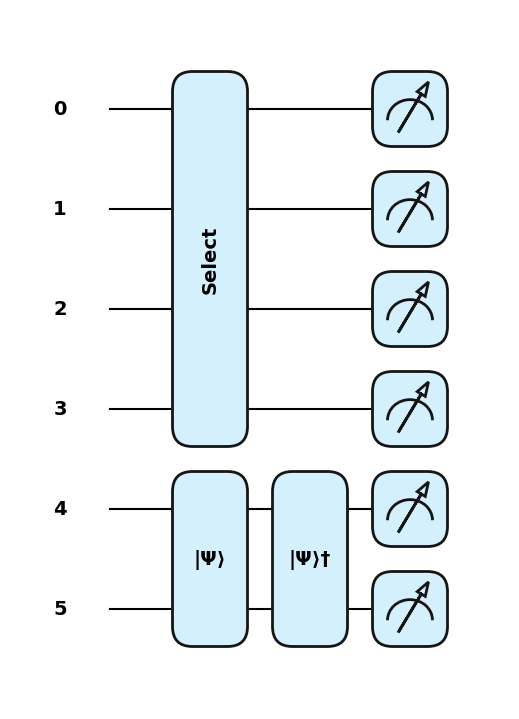

In [ ]:
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

a = 2  # 0.5 #0.25
b = 0.75

# Matrix to be decomposed
A = np.array(
    [[a, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0]]
)

LCU = qml.pauli_decompose(A)
LCU_coeffs, LCU_ops = LCU.terms()

print(f"LCU decomposition:\n {LCU}")
print(f"Coefficients:\n {LCU_coeffs}")
print(f"Unitaries:\n {LCU_ops}")

dev1 = qml.device("default.qubit", wires=2)

# Normalized square roots of coefficients
alphas = np.sqrt(LCU_coeffs) / np.linalg.norm(np.sqrt(LCU_coeffs))

@qml.qnode(dev1)
def prep_circuit():
    qml.StatePrep(alphas, wires=[0, 1])
    return qml.state()

print("Target state: ", alphas)
print("Output state: ", np.real(prep_circuit()))

# Create instances of the unitary operations
unitaries = [
    qml.Identity(wires=[2, 3]),
    qml.Identity(wires=2) @ qml.PauliZ(wires=3),
    qml.PauliZ(wires=2) @ qml.Identity(wires=3),
    qml.PauliZ(wires=2) @ qml.PauliZ(wires=3)
]

dev2 = qml.device("default.qubit", wires=6)

@qml.qnode(dev2)
def lcu_circuit():  # block_encode
    # PREP
    qml.StatePrep(alphas, wires=[4, 5])

    # SEL
    qml.Select(unitaries, control=[0, 1])

    # PREP_dagger
    qml.adjoint(qml.StatePrep(alphas, wires=[4, 5]))
    return qml.state()

output_matrix = qml.matrix(lcu_circuit)()
print("A:\n", A, "\n")
print("Block-encoded A:\n")
print(np.real(np.round(output_matrix, 2)))
print()

qml.draw_mpl(lcu_circuit, style='pennylane')()
plt.show()


In [ ]:
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

a = 2  # 0.5 #0.25
b = 0.75

# Matrix to be decomposed
A = np.array(
    [[a, 0, 0, 0],
     [0, a, 0, 0],
     [0, 0, a, 0],
     [0, 0, 0, a]]
)

LCU = qml.pauli_decompose(A)
LCU_coeffs, LCU_ops = LCU.terms()

print(f"LCU decomposition:\n {LCU}")
print(f"Coefficients:\n {LCU_coeffs}")
print(f"Unitaries:\n {LCU_ops}")

dev1 = qml.device("default.qubit", wires=2)

# Normalized square roots of coefficients
alphas = np.sqrt(LCU_coeffs) / np.linalg.norm(np.sqrt(LCU_coeffs))

@qml.qnode(dev1)
def prep_circuit():
    qml.StatePrep(alphas, wires=[0, 1])
    return qml.state()

print("Target state: ", alphas)
print("Output state: ", np.real(prep_circuit()))

# Create instances of the unitary operations
unitaries = [
    qml.Identity(wires=[2, 3]),
    qml.Identity(wires=2) @ qml.PauliZ(wires=3),
    qml.PauliZ(wires=2) @ qml.Identity(wires=3),
    qml.PauliZ(wires=2) @ qml.PauliZ(wires=3)
]

dev2 = qml.device("default.qubit", wires=6)

@qml.qnode(dev2)
def lcu_circuit():  # block_encode
    # PREP
    qml.StatePrep(alphas, wires=[4, 5])

    # SEL
    qml.Select(unitaries, control=[0, 1])

    # PREP_dagger
    qml.adjoint(qml.StatePrep(alphas, wires=[4, 5]))
    return qml.state()

output_matrix = qml.matrix(lcu_circuit)()
print("A:\n", A, "\n")
print("Block-encoded A:\n")
print(np.real(np.round(output_matrix, 2)))
print()

qml.draw_mpl(lcu_circuit, style='pennylane')()
plt.show()


LCU decomposition:
 2.0 * (I(0) @ I(1))
Coefficients:
 [2.]
Unitaries:
 [I(0) @ I(1)]
Target state:  [1.]


ValueError: State vector must have shape (2**wires,) or (batch_size, 2**wires).

# Application: Projectors

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.9 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 86.2 MB/s eta 0:00:00


In [ ]:
pip install fable-circuits

In [ ]:
from fable import fable
import numpy as np
from qiskit_aer import Aer
simulator = Aer.get_backend("unitary_simulator")


# generate a random matrix and block encode it
n = 3
N = 2**n
A = np.random.randn(N, N)
circ, alpha = fable(A, 0)
result = simulator.run(circ).result()
unitary = result.get_unitary(circ)
np.linalg.norm(alpha * N * unitary.data[0:N, 0:N] - A)/np.linalg.norm(A)

AttributeError: 'QuantumCircuit' object has no attribute 'cnot'